# **ML Terapan - Submission 1 Predictive Analytics - Shendi Teuku Maulana Efendi**

# **Mount to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler)
from sklearn.model_selection import (train_test_split, GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, cross_val_score)
from sklearn.linear_model import (LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.feature_selection import RFE
from sklearn.metrics import (r2_score, mean_squared_error)
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor)
from xgboost import XGBRFRegressor, XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

# Setting options and context
warnings.filterwarnings('ignore')
sns.set_context("paper", font_scale=1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

# **Load Dataset**

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/Kuliah/Dicoding/Submission/Regression House Price Prediction/Dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Kuliah/Dicoding/Submission/Regression House Price Prediction/Dataset/test.csv')

# **Data Understanding**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# **Check Missing Values**

cek missing values di `train dataset`

In [ ]:
missing_num = train[train.columns].isna().sum().sort_values(ascending=False)
missing_perc = (train[train.columns].isna().sum()/len(train)*100).sort_values(ascending=False)
missing = pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_train = missing[missing['Percentage']>0]
missing_train

Total  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageYrBlt      81    5.547945
GarageCond       81    5.547945
GarageType       81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493

cek missing values di `test dataset`

In [ ]:
missing_num = test[test.columns].isna().sum().sort_values(ascending=False)
missing_perc = (test[test.columns].isna().sum()/len(test)*100).sort_values(ascending=False)
missing = pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_test = missing[missing['Percentage']>0]
missing_test

Total  Percentage
PoolQC         1456   99.794380
MiscFeature    1408   96.504455
Alley          1352   92.666210
Fence          1169   80.123372
MasVnrType      894   61.274846
FireplaceQu     730   50.034270
LotFrontage     227   15.558602
GarageYrBlt      78    5.346127
GarageQual       78    5.346127
GarageFinish     78    5.346127
GarageCond       78    5.346127
GarageType       76    5.209047
BsmtCond         45    3.084304
BsmtQual         44    3.015764
BsmtExposure     44    3.015764
BsmtFinType1     42    2.878684
BsmtFinType2     42    2.878684
MasVnrArea       15    1.028101
MSZoning          4    0.274160
BsmtHalfBath      2    0.137080
Utilities         2    0.137080
Functional        2    0.137080
BsmtFullBath      2    0.137080
BsmtFinSF1        1    0.068540
BsmtFinSF2        1    0.068540
BsmtUnfSF         1    0.068540
KitchenQual       1    0.068540
TotalBsmtSF       1    0.068540
Exterior2nd       1    0.068540
GarageCars        1    0.068540
Exterior1st       1    0.068540
GarageArea        1    0.068540
SaleType          1    0.068540

#### _Ada 19 attributes punya missing values and 5 features (PoolQC, MiscFeature, Alley, Fence, FireplaceQu) punya missing values lebih besar dari 45%_

# **Feature**

<b>`Numerical features`</b>: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

<b>`Categorical features`</b>: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [ ]:
numerical = train.select_dtypes(include=['int64','float64']).drop(['SalePrice','Id'],axis=1)
numerical.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [ ]:
categorical = train.select_dtypes(exclude=['int64','float64'])
categorical.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

# **Exploratory Data Analysis**

### Plotting missing value pada train and test data

In [ ]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9)

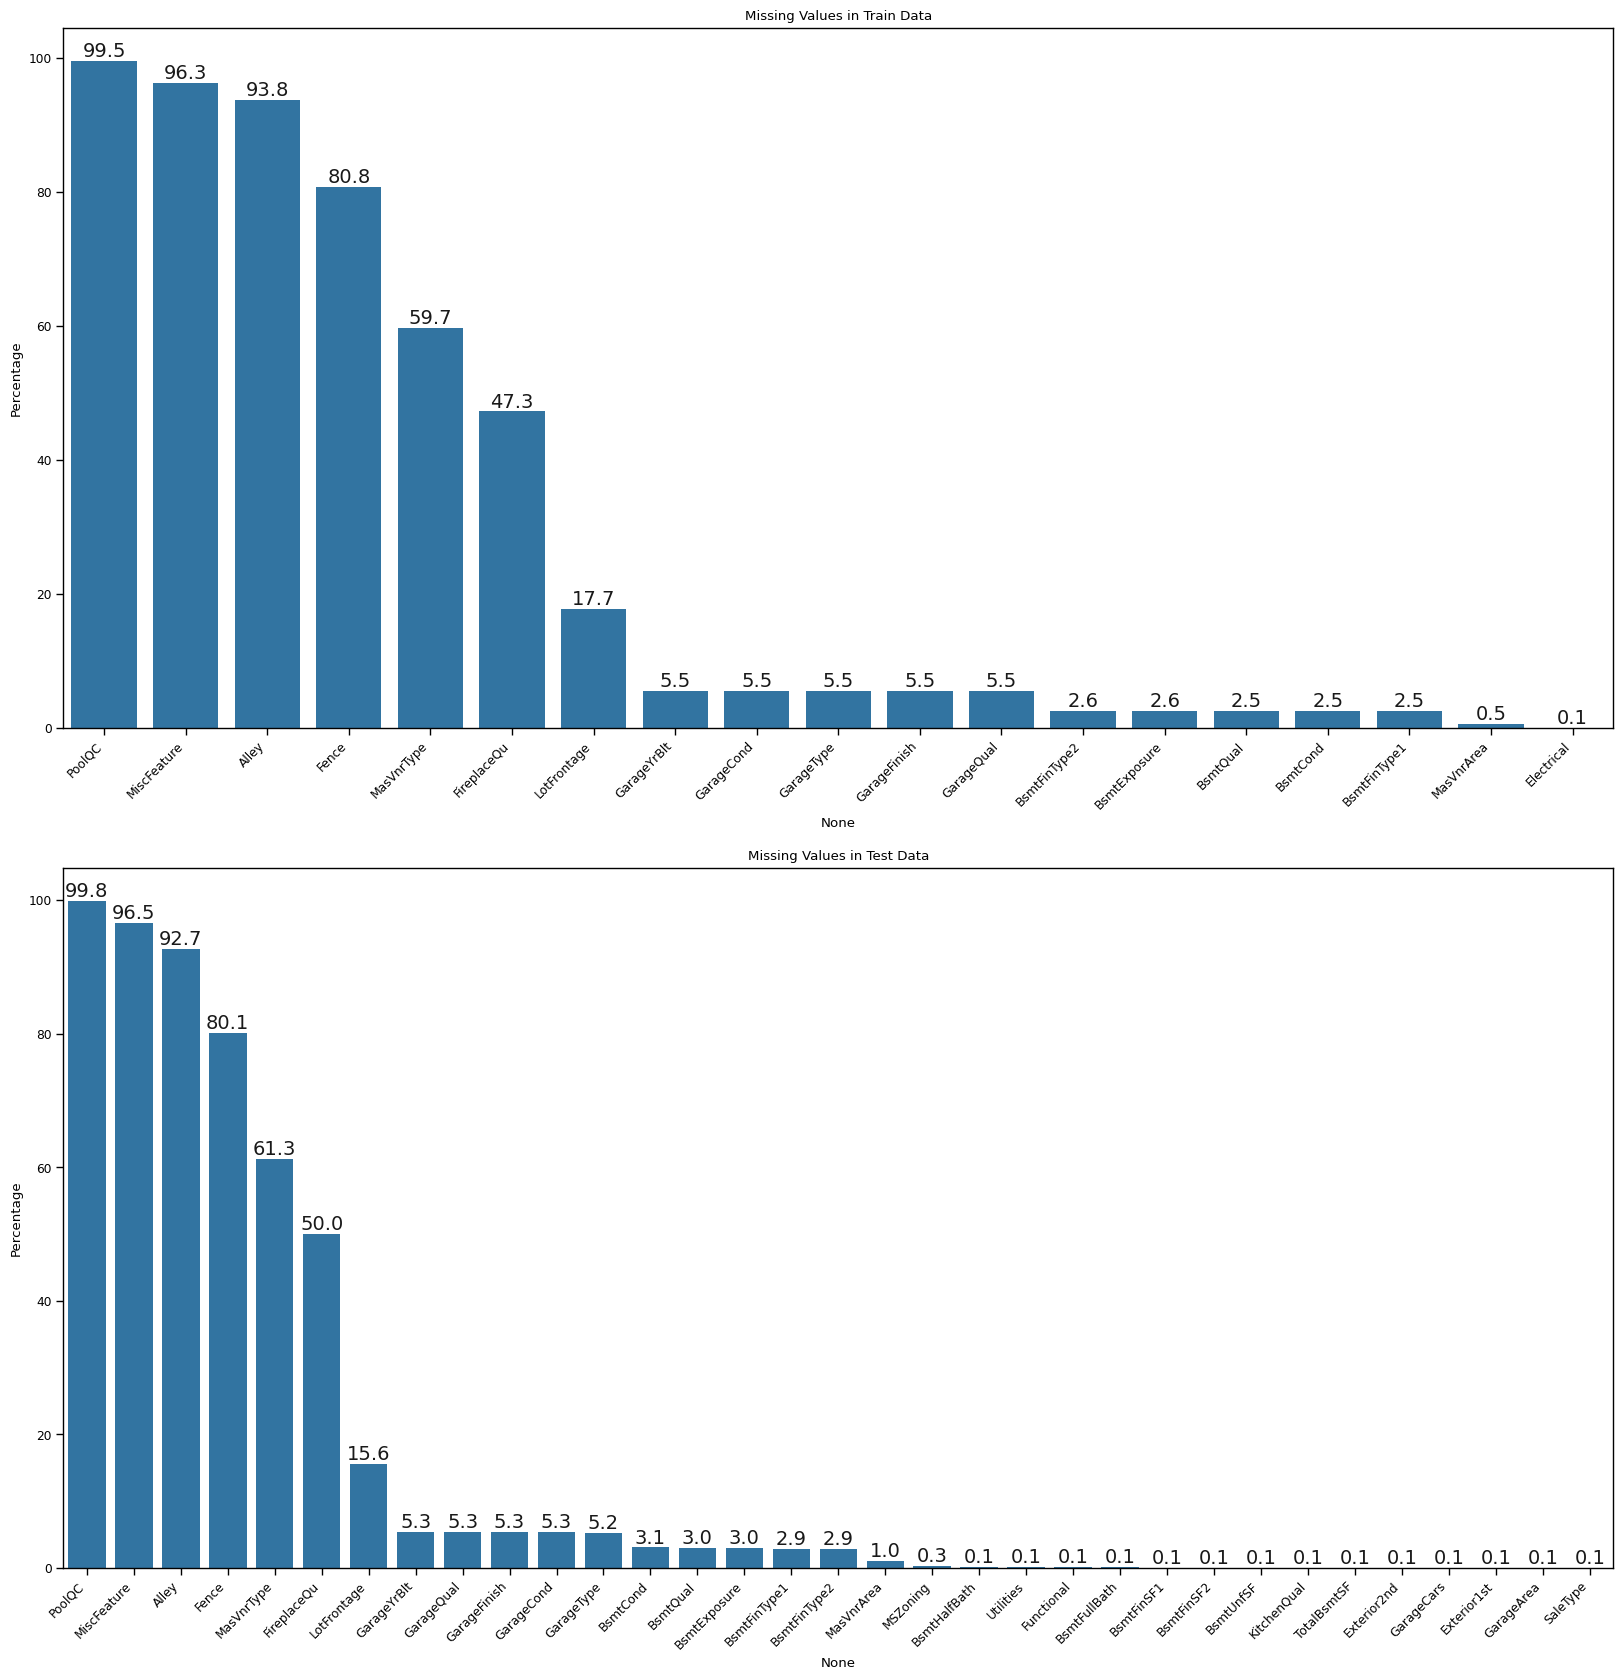

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax1=sns.barplot(x=missing_train.index,y='Percentage',data=missing_train)
showvalues(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_title('Missing Values in Train Data')
plt.subplot(2,1,2)
ax2=sns.barplot(x=missing_test.index,y='Percentage',data=missing_test)
showvalues(ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set_title('Missing Values in Test Data')
plt.show()

In [ ]:
# Drop Id column from train and test test
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


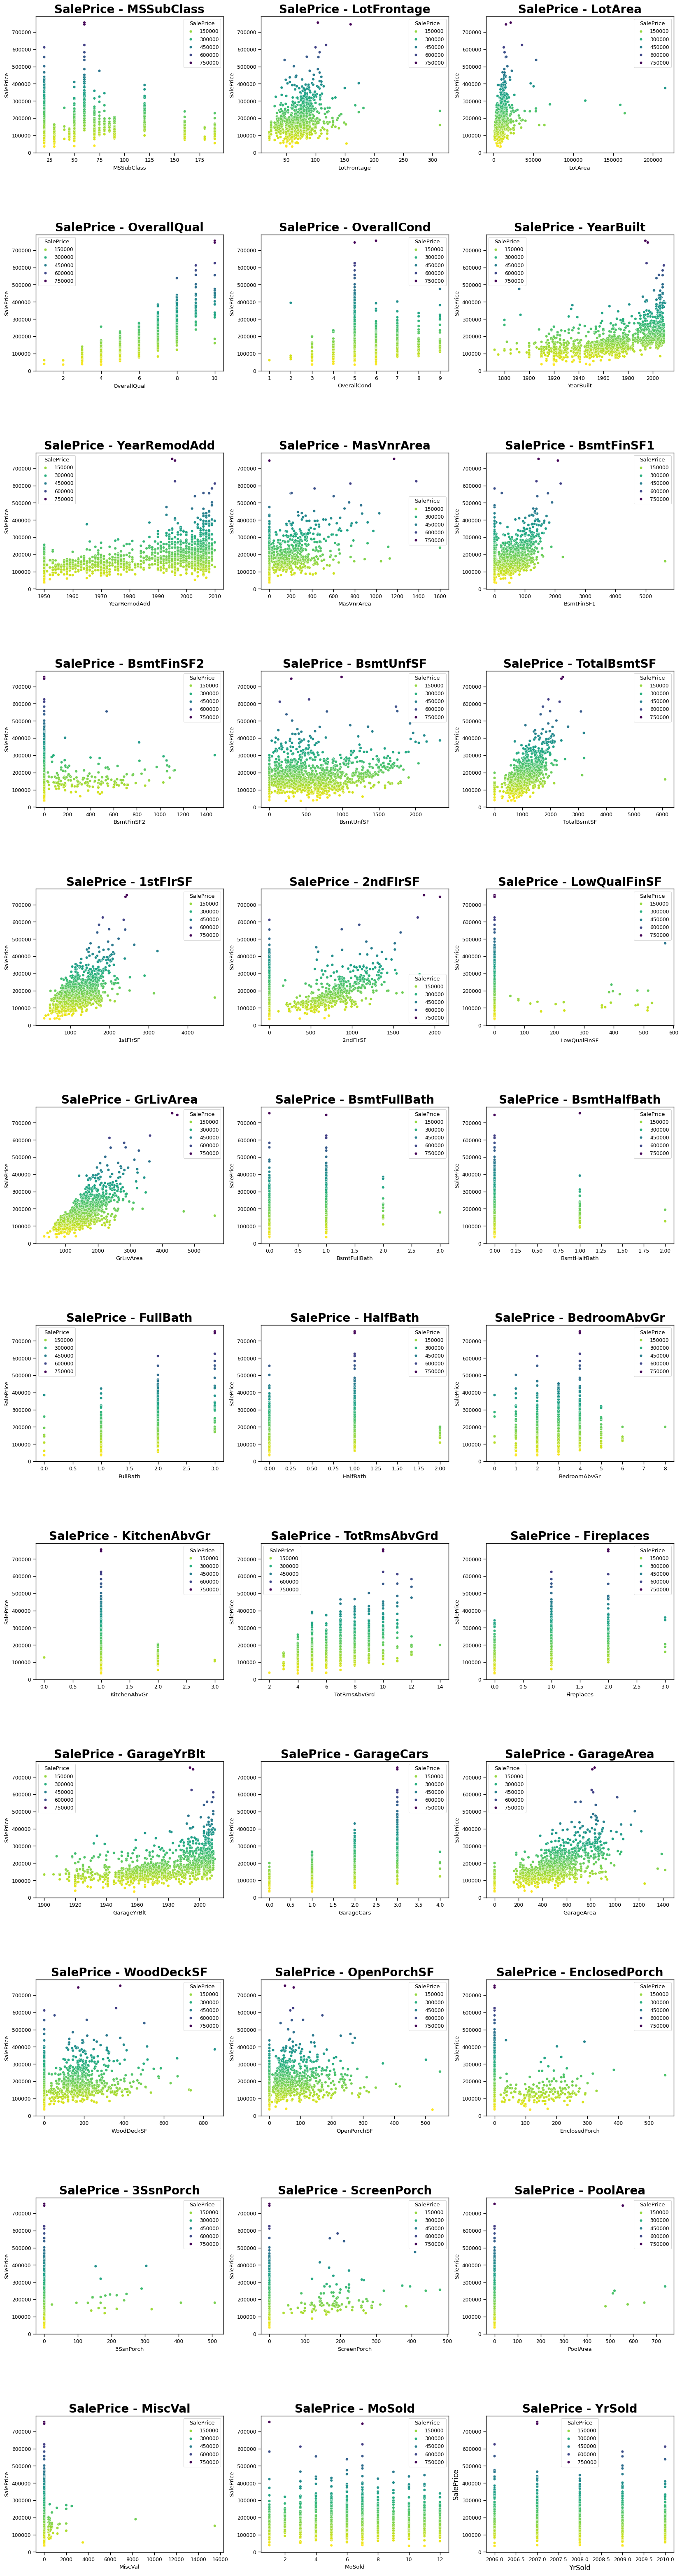

In [ ]:
#Visualising numerical predictor variables with Target Variables
train_num = train.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
#adjust horizontal space between plots
fig.subplots_adjust(hspace=0.6)
for i,ax in zip(train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=train_num,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    #ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

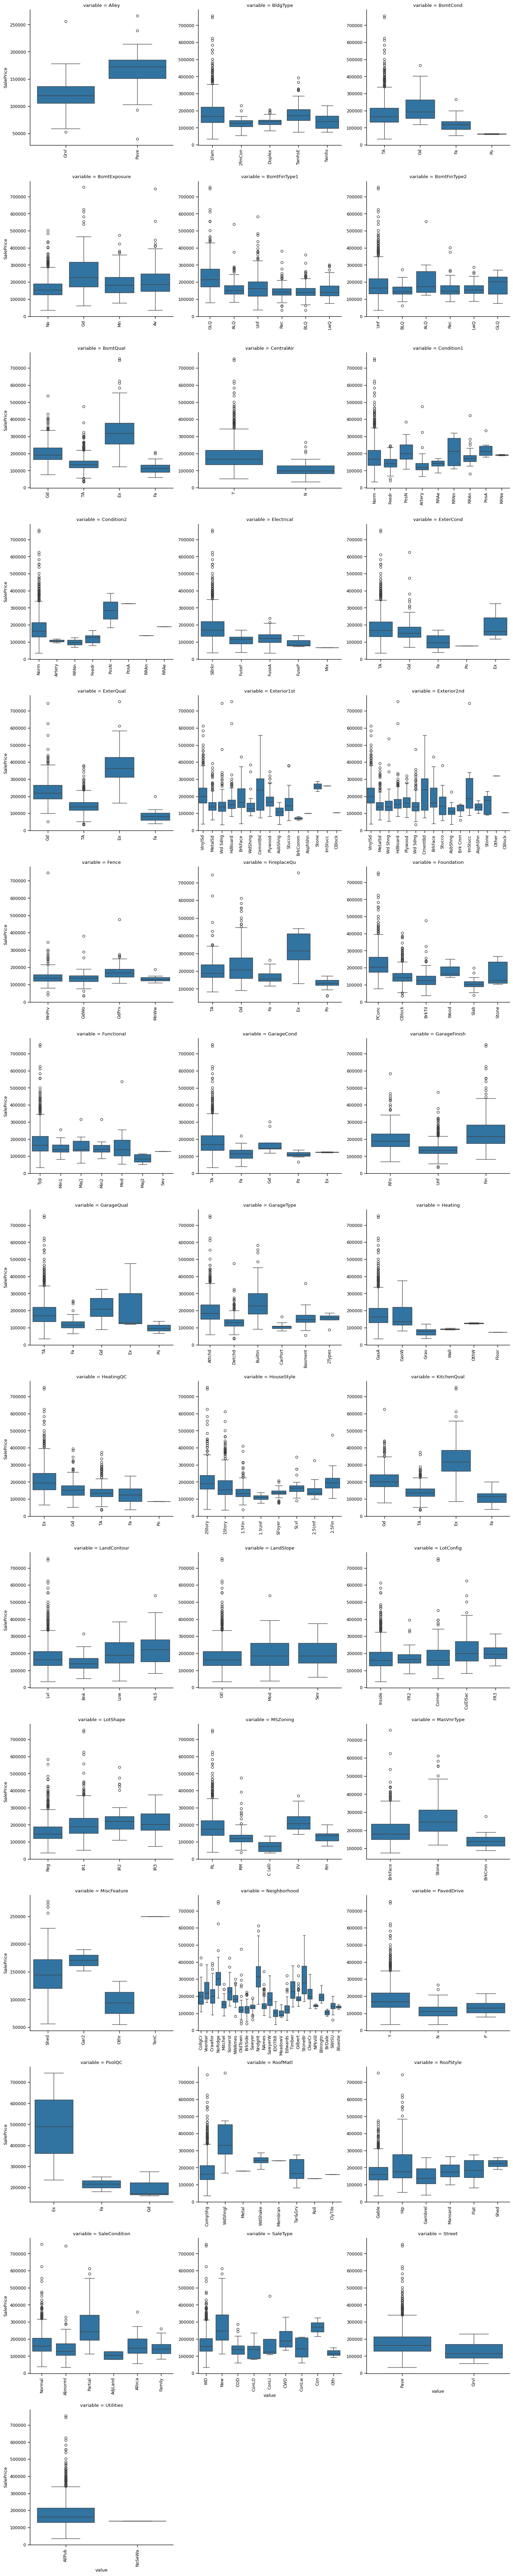

In [ ]:
# Visualising Categorical predictor variables with Target Variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(train[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

_<b>bisa dilihat dari boxplots, pada SalePrice fullbath=3 lebih tinggi dari 0,1, atau 2. untuk SalePrice OverallQual=10 lebih tinggi daripada yang lain._

<Axes: xlabel='SalePrice', ylabel='Density'>

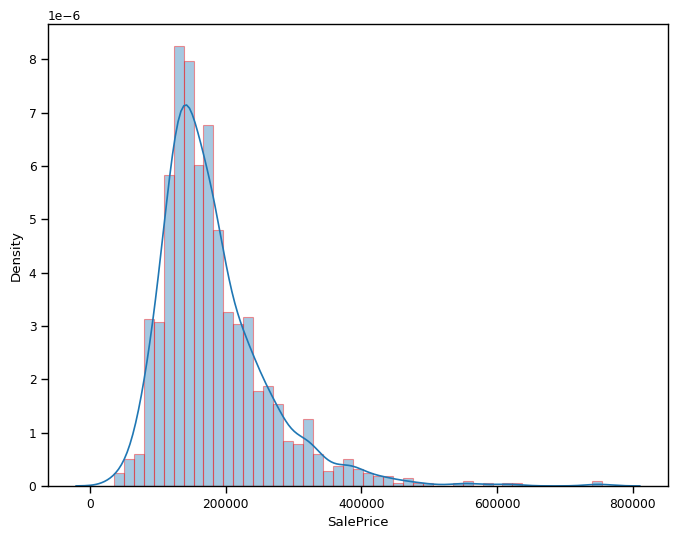

In [ ]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

In [ ]:
# Skew and kurtosis for SalePrice
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
#Applying log transformation to remove skewness and make target variable normally distributed
train['SalePrice'] = np.log1p(train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

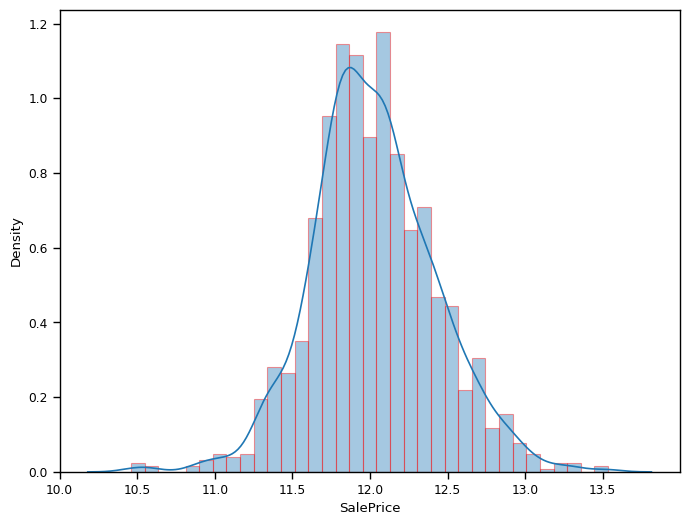

In [ ]:
#Plotting graph again to see if its normally distributed or not and see outliers
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

<b>`Now SalePrice is normally distributed`

<Axes: >

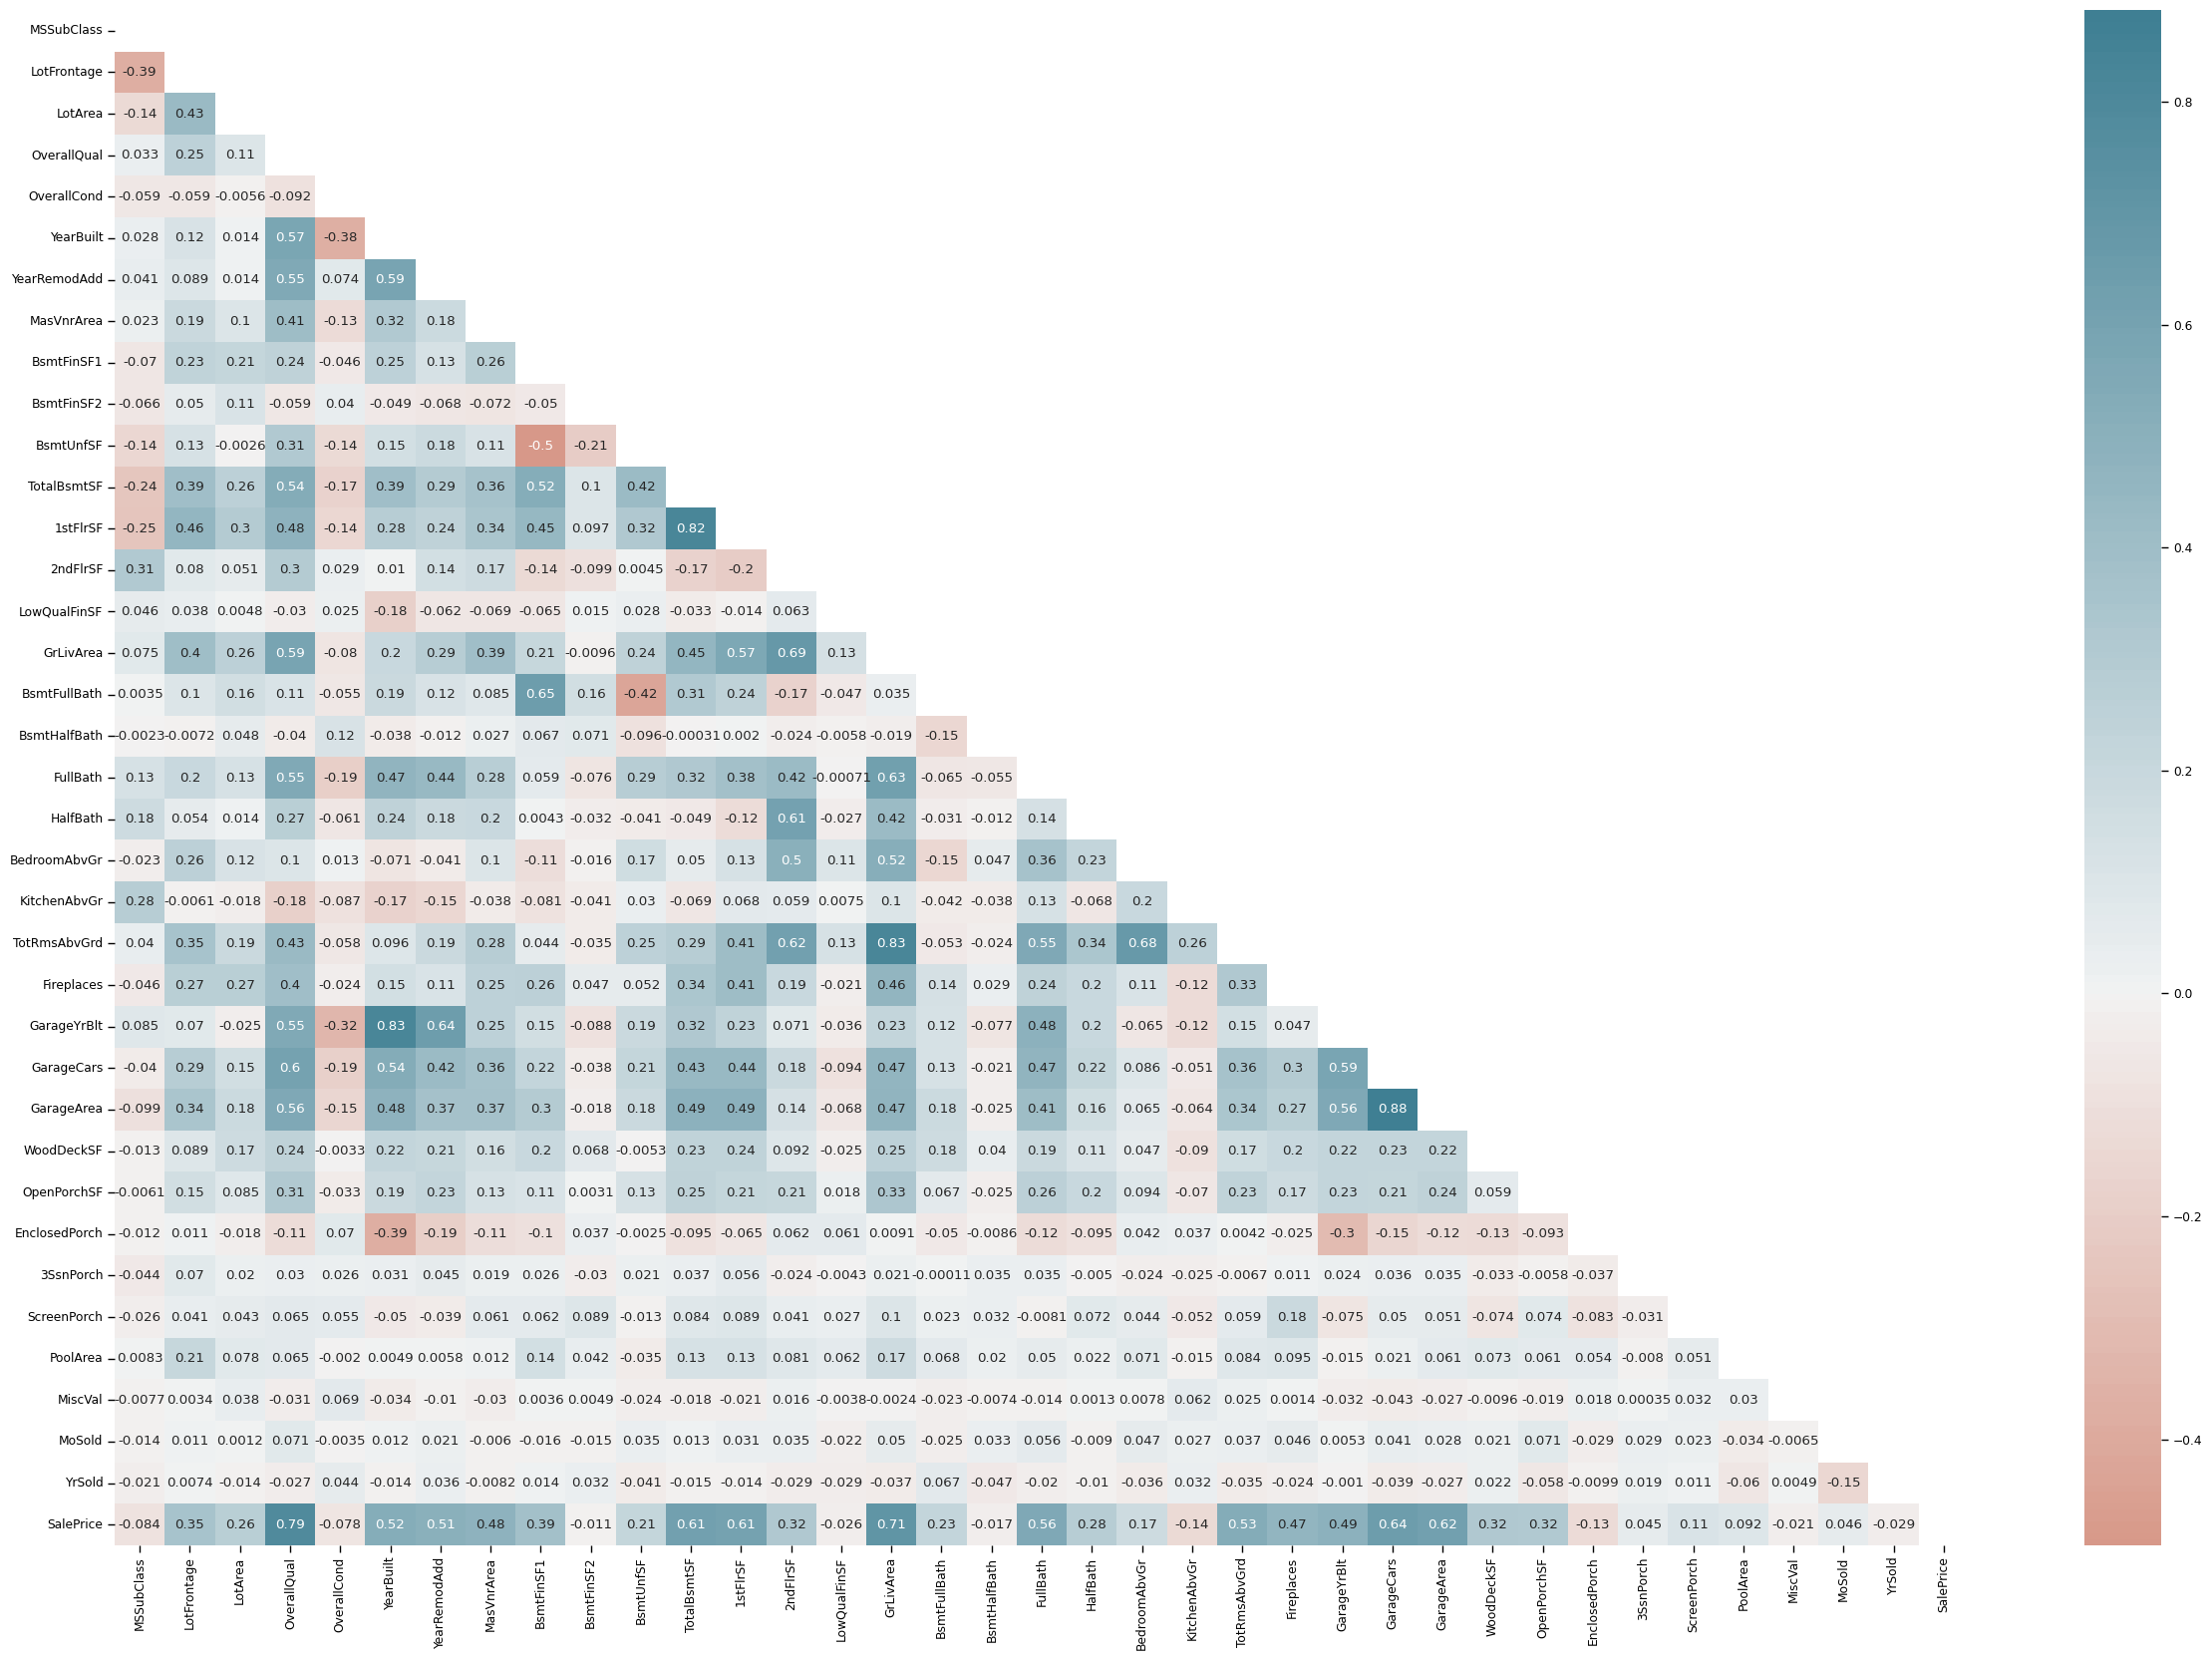

In [ ]:
#Correlation between variables to check multicollinearity
# Generate a mask for the upper triangle (taken from seaborn example gallery)
plt.subplots(figsize = (30,20))
# Changed np.bool to bool
mask = np.zeros_like(train_num.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
#Plotting heatmap
sns.heatmap(train_num.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0)

* Terdapat korelasi sebesar 0,83 atau 83% antara **GarageYrBlt** dan **TahunDibangun**.
* Korelasi 83% antara **TotRmsAbvGrd** dan **GrLivArea**.
* Korelasi 89% antara **GarasiMobil** dan **GarasiArea**.
* Demikian pula banyak fitur lain seperti **BsmtUnfSF**, **FullBath** memiliki korelasi yang baik dengan fitur independen lainnya.

# **Data Preparation**

Penanganan pada Outliers

In [ ]:
## Deleting those two values with outliers.
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

<b>`Menggabungkan train and test data untuk menghandle missing values pada train and test data, datatype issues, skewness dan transformation.`

In [ ]:
y=train['SalePrice']
train_df=train.drop('SalePrice',axis=1)
test_df = test
df_all= pd.concat([train_df,test_df]).reset_index(drop=True)

In [ ]:
df_all['age']=df_all['YrSold']-df_all['YearBuilt']
# Some of the non-numeric predictors are stored as numbers; convert them into strings
#will convert those columns into dummy variables later.
df_all[['MSSubClass']] = df_all[['MSSubClass']].astype(str)
df_all['YrSold'] = df_all['YrSold'].astype(str) #year
df_all['MoSold'] = df_all['MoSold'].astype(str) #month

Menghandle missing values dari 19 feature yang sudah dijelaskan diatas

In [ ]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
df_all['Functional'] = df_all['Functional'].fillna('Typ')
df_all['Electrical'] = df_all['Electrical'].fillna('SBrkr') #Filling with modef
# data description states that NA refers to "No Pool"
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
# Replacing the missing values with 0, since no garage = no cars in garage inferred from data dictionary
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['KitchenQual'] = df_all['KitchenQual'].fillna("TA")
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
# Replacing the missing values with None inferred from data dictionary
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_all[col] = df_all[col].fillna('None')
# Replacing the missing values with None
# NaN values for these categorical basement df_all, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_all[col] = df_all[col].fillna('None')
#Replacing missing value it with median beacuse of outliers
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Replacing the missing values with None
# We have no particular intuition around how to fill in the rest of the categorical df_all
# So we replace their missing values with None
objects = []
for i in df_all.columns:
    if df_all[i].dtype == object:
        objects.append(i)
df_all.update(df_all[objects].fillna('None'))

numeric_dtypes = [ 'int64','float64']
numerics = []
for i in df_all.columns:
    if df_all[i].dtype in numeric_dtypes:
        numerics.append(i)
df_all.update(df_all[numerics].fillna(0))

df_all['MSZoning'] = df_all.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#Checking percentage of null values present in dataset
missing_perc= (df_all[df_all.columns].isna().sum()/len(df_all)*100).sort_values(ascending=False)
print(missing_perc[missing_perc>0].sum()) #No missing values

0.0


### Menangani Skewness dalam variabel prediktor

Mengapa menghilangkan Skewness dari model dan variabel prediktor kita?
- Agar koefisien dapat ditafsirkan, regresi linier mengasumsikan beberapa hal
- 'Homoskedastisitas' (yaitu, kesalahan yang dilakukan model Anda harus memiliki varians yang sama) dan istilah kesalahan harus 'terdistribusi secara normal'.
- Mengikuti asumsi regresi linier adalah penting jika Anda ingin `menginterpretasikan koefisien` dan dapat digunakan dalam tujuan bisnis.
- Ketika variabel dependen memiliki kemiringan seperti data kita, maka residualnya juga akan demikian. maka dari itu melakukan`handling skewness` pada data.
- Model ini kemudian akan digunakan untuk memahami bagaimana tepatnya harga bervariasi dengan variabel.

In [ ]:
# menghilangkan skewness dari variabel target (Harga Jual) dan membuatnya terdistribusi secara normal.
# cari tahu apakah variabel prediktor numerik sebagian besar condong atau tidak
df_all_num = df_all.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
age               0.598015
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

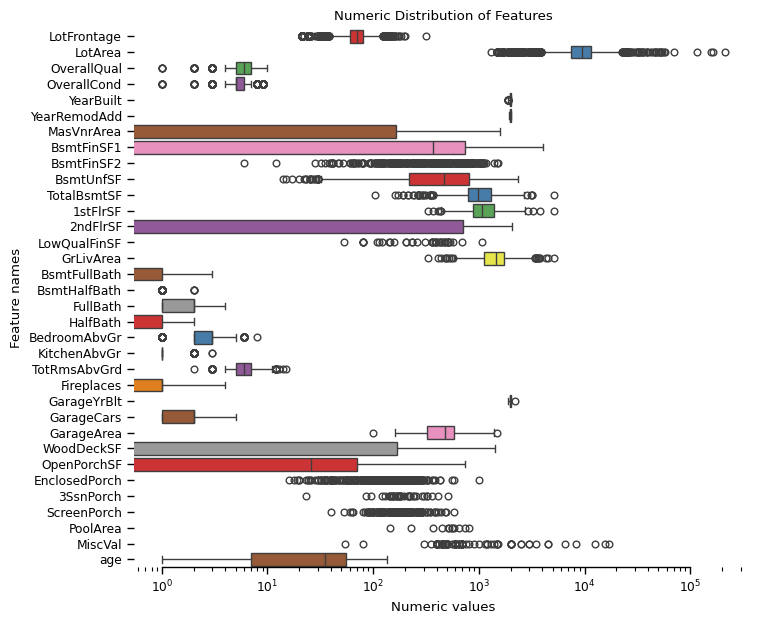

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all_num , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
print(df_all[skew_index].min())

MiscVal             0.0
PoolArea            0.0
LotArea          1300.0
LowQualFinSF        0.0
3SsnPorch           0.0
KitchenAbvGr        0.0
BsmtFinSF2          0.0
EnclosedPorch       0.0
ScreenPorch         0.0
BsmtHalfBath        0.0
MasVnrArea          0.0
OpenPorchSF         0.0
WoodDeckSF          0.0
1stFlrSF          334.0
LotFrontage        21.0
GrLivArea         334.0
BsmtFinSF1          0.0
BsmtUnfSF           0.0
2ndFlrSF            0.0
TotRmsAbvGrd        2.0
Fireplaces          0.0
HalfBath            0.0
TotalBsmtSF         0.0
BsmtFullBath        0.0
age                -1.0
OverallCond         1.0
dtype: float64


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Menggunakan Yeo-Johnson jika ada nilai negatif
transformer = PowerTransformer(method='yeo-johnson')
df_all[skew_index] = transformer.fit_transform(df_all[skew_index])

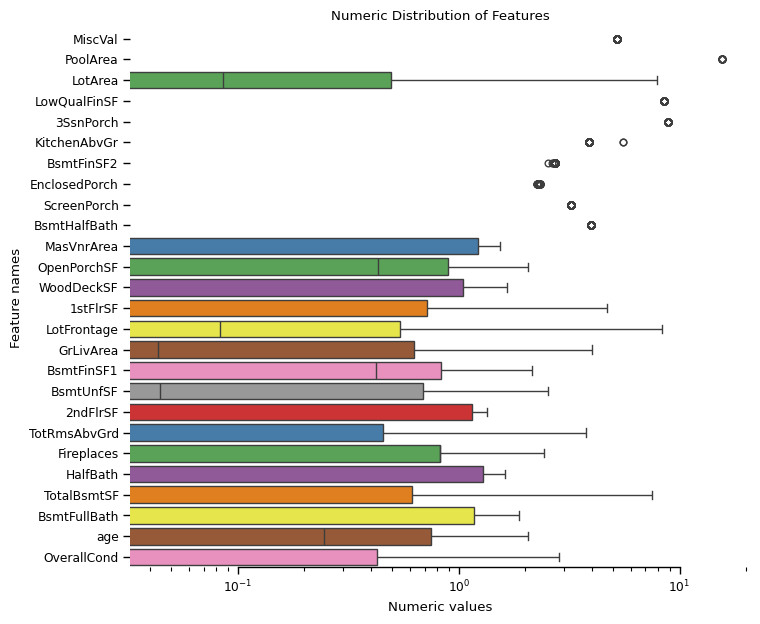

In [ ]:
# Let's make sure we handled all the skewed values
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

<b>Feature terlihat terdistribusi secara normal sekarang, tidak ada banyak kemiringan dalam distribusi variabel prediktor.

### Menghapus fitur yang tidak memberikan informasi penting.
- Membuat fitur baru berdasarkan penggabungan atau transformasi dari beberapa kolom yang sudah ada.
- Fitur-fitur baru tersebut seperti `Total_sqr_footage, Total_Bathrooms, dan Total_porch_sf` bisa membantu meningkatkan performa model prediksi karena mereka memberikan gambaran yang lebih menyeluruh tentang kondisi fisik rumah, yang berhubungan langsung dengan harga rumah.

In [ ]:
print(df_all['Utilities'].value_counts())
print(df_all['Street'].value_counts())
print(df_all['PoolQC'].value_counts())

Utilities
AllPub    2914
None         2
NoSeWa       1
Name: count, dtype: int64
Street
Pave    2905
Grvl      12
Name: count, dtype: int64
PoolQC
None    2908
Ex         4
Gd         3
Fa         2
Name: count, dtype: int64


In [ ]:
df_all=df_all.drop(['Utilities', 'Street', 'PoolQC'], axis=1) # not useful df_all, evident from above
# vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df_all['YrBltAndRemod']=df_all['YearBuilt']+df_all['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_all['Total_sqr_footage'] = (df_all['BsmtFinSF1'] + df_all['BsmtFinSF2'] +
                                 df_all['1stFlrSF'] + df_all['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df_all['Total_Bathrooms'] = (df_all['FullBath'] + (0.5 * df_all['HalfBath']) +
                               df_all['BsmtFullBath'] + (0.5 * df_all['BsmtHalfBath']))
#Creating derived column for total porch area
df_all['Total_porch_sf'] = (df_all['OpenPorchSF'] + df_all['3SsnPorch'] + df_all['EnclosedPorch'] + \
                              df_all['ScreenPorch'] + df_all['WoodDeckSF'])

- Membuat Fitur Biner: Fitur biner seperti ini memudahkan model dalam menangani atribut yang bersifat "ada atau tidak", yang membantu meningkatkan performa prediksi dengan memberikan informasi yang lebih mudah dipahami oleh model.

- Mengganti Nilai Nol: Penggantian nilai nol dengan angka yang lebih logis dilakukan karena nilai nol seringkali tidak mencerminkan kondisi sebenarnya. Misalnya, beberapa rumah mungkin tidak memiliki basement, tapi ada juga kemungkinan bahwa data untuk rumah dengan basement tidak tercatat dengan benar. Menggunakan nilai eksponensial seperti ini adalah cara untuk menghindari nilai nol yang dapat mengganggu distribusi fitur dan membuat model lebih robust.

In [ ]:
df_all['has_pool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_2ndfloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_garage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_bsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_fireplace'] = df_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] =df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_wooddeck'] =df_all['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_enclosedporch'] = df_all['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_3ssnporch']=df_all['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_openporch'] = df_all['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['has_screenporch'] = df_all['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

### Melakukan normal transformation


In [ ]:
def log_transform(result, features):
    m = result.shape[1]
    for feature in features:
        result = result.assign(newcol=pd.Series(np.log(1.01+result[feature])).values)
        result.columns.values[m] = feature + '_log'
        m += 1
    return result

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

df_all = log_transform(df_all, log_features)

Mengapa Menggunakan Log Transformation?: <br>
Log transformation sering digunakan dalam machine learning dan statistical modeling ketika distribusi fitur numerik sangat skewed (tidak normal). Log transformation membantu untuk:
1. Mengurangi skewness: Data yang memiliki distribusi skewed menjadi lebih mendekati distribusi normal setelah log transformation.
2. Mengurangi dampak outliers: Nilai yang sangat besar (outliers) menjadi lebih kecil dalam skala log, sehingga bisa membantu model dalam mempelajari pola lebih baik.
3. Meningkatkan performa model: Distribusi fitur yang lebih normal biasanya membuat algoritma machine learning bekerja lebih efisien dan akurat.

### Menangani kolom-kolom kategorikal dan mengubahnya menjadi fitur numerik melalui teknik one-hot encoding.

In [ ]:
df_all_num= df_all.select_dtypes(include=['float64','int64']).columns  # Numerical columns
df_all_temp = df_all.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
df_all_dummy= pd.get_dummies(df_all_temp)
df_all=pd.concat([df_all,df_all_dummy],axis=1) # joining converted dummy feature and original df_all dataset
df_all= df_all.drop(df_all_temp.columns,axis=1) #removing original categorical columns
df_all.shape

(2917, 368)

In [ ]:
X= df_all[:len(train)] #converted into train data
Z_test= df_all[len(train):] #test data
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1458, 368)
Test Data Shape: (1459, 368)


In [ ]:
#based on describe method and scatter plot, removing outliers
outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']

def drop_outliers(x):
    list = []
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x
X = drop_outliers(X)
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])
print(X.shape)

(1453, 368)


Menghapus outlier dari dataset X dan target y berdasarkan beberapa kolom yang mengandung nilai ekstrem dan juga berdasarkan indeks outlier yang telah ditentukan sebelumnya.

<b>`Jika ada satu nilai yang muncul hampir di semua baris (lebih dari 99.94% dari seluruh data), fitur tersebut dianggap tidak bermanfaat dalam proses pembelajaran model. Alasannya, jika hampir semua baris memiliki nilai yang sama untuk sebuah fitur, maka fitur tersebut tidak memberikan variasi atau informasi yang cukup bagi model untuk belajar. Dengan kata lain, fitur yang isinya hampir sama di seluruh dataset tidak membantu model membedakan antara contoh data yang satu dengan yang lain, sehingga dihapus karena dianggap tidak relevan untuk prediksi.`

In [ ]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99.94:
            redundant.append(i)
    redundant = list(redundant)
    return redundant


redundant_features = redundant_feature(X)

X = X.drop(redundant_features, axis=1)
Z_test = Z_test.drop(redundant_features, axis=1)

 Menghapus fitur yang redundan atau tidak memberikan informasi yang signifikan dalam proses prediksi. Fitur-fitur tersebut dianggap redundan jika lebih dari 99.94% nilainya sama (konstan) di seluruh dataset. Dengan membuang fitur yang redundan dari X (train) dan Z_test (test), model akan lebih efisien dan tidak terganggu oleh fitur yang tidak bervariasi.

In [ ]:
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',Z_test.shape)  #test set shape

Train Data Shape: (1453, 366)
Test Data Shape: (1459, 366)


# **Cross Validation**

In [ ]:
kfold= KFold(n_splits=11,random_state=42,shuffle=True) #kfold cross validation

In [ ]:
# Error function to compute error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not
# available inside cross_val_score method
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

# **Splitting Data Into Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1017, 366)
(1017,)
(436, 366)


# **Modelling**

In [ ]:
from sklearn.impute import SimpleImputer

# Menggunakan SimpleImputer untuk mengisi NaN dengan rata-rata kolom
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ridge Regression

In [ ]:
# 1. Ridge Regression
ridge = Ridge()
params = {'alpha': [5, 8, 10, 10.1, 10.2, 10.3, 10.35, 10.36, 11, 12, 15]}
scaler = RobustScaler()

# Mengubah data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melakukan GridSearchCV
grid_ridge = GridSearchCV(ridge, param_grid=params, cv=kfold, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

# Mendapatkan alpha terbaik
alpha = grid_ridge.best_params_['alpha']
ridge_score = -grid_ridge.best_score_  # Negasi karena scoring adalah negatif MSE

# Melatih model Ridge dengan alpha terbaik
ridge_alpha = Ridge(alpha=alpha)
ridge_alpha.fit(X_train_scaled, y_train)

# Melakukan prediksi
y_pred_train_ridge = ridge_alpha.predict(X_train_scaled)
y_pred_test_ridge = ridge_alpha.predict(X_test_scaled)

# Menghitung RMSE dan MSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
train_mse = mean_squared_error(y_train, y_pred_train_ridge)
test_mse = mean_squared_error(y_test, y_pred_test_ridge)

print('RMSE Train (Ridge) =', train_rmse)
print('MSE Train (Ridge) =', train_mse)
print('RMSE Test (Ridge) =', test_rmse)
print('MSE Test (Ridge) =', test_mse)

RMSE Train (Ridge) = 0.08346616195066428
MSE Train (Ridge) = 0.006966600190774518
RMSE Test (Ridge) = 0.10665046044097773
MSE Test (Ridge) = 0.011374320712272555


# Lasso Regression

In [ ]:
# 2. Lasso Regression
lasso = Lasso(alpha=0.001)  # Contoh alpha
lasso.fit(X_train_scaled, y_train)
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

lasso_mse_train = mean_squared_error(y_train, y_pred_train_lasso)
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)

print(f"Lasso - Train MSE: {lasso_mse_train}, Train RMSE: {lasso_rmse_train}")
print(f"Lasso - Test MSE: {lasso_mse_test}, Test RMSE: {lasso_rmse_test}")

Lasso - Train MSE: 0.00916663663556468, Train RMSE: 0.09574255394319017
Lasso - Test MSE: 0.010996769710579864, Test RMSE: 0.10486548388568978


# ElasticNet Regression

In [ ]:
# 3. ElasticNet Regression
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)  # Contoh hyperparameter
elasticnet.fit(X_train_scaled, y_train)
y_pred_train_elastic = elasticnet.predict(X_train_scaled)
y_pred_test_elastic = elasticnet.predict(X_test_scaled)

elastic_mse_train = mean_squared_error(y_train, y_pred_train_elastic)
elastic_rmse_train = np.sqrt(elastic_mse_train)
elastic_mse_test = mean_squared_error(y_test, y_pred_test_elastic)
elastic_rmse_test = np.sqrt(elastic_mse_test)

print(f"ElasticNet - Train MSE: {elastic_mse_train}, Train RMSE: {elastic_rmse_train}")
print(f"ElasticNet - Test MSE: {elastic_mse_test}, Test RMSE: {elastic_rmse_test}")

ElasticNet - Train MSE: 0.008074343996440195, Train RMSE: 0.08985735360247482
ElasticNet - Test MSE: 0.011021258794558623, Test RMSE: 0.10498218322438634


# Support Vector Regressor

In [ ]:
# 4. Support Vector Regression (SVR)
svr = SVR(C=19, epsilon=0.008, gamma=0.00015)
svr.fit(X_train_scaled, y_train)
y_pred_train_svr = svr.predict(X_train_scaled)
y_pred_test_svr = svr.predict(X_test_scaled)

svr_mse_train = mean_squared_error(y_train, y_pred_train_svr)
svr_rmse_train = np.sqrt(svr_mse_train)
svr_mse_test = mean_squared_error(y_test, y_pred_test_svr)
svr_rmse_test = np.sqrt(svr_mse_test)

print(f"SVR - Train MSE: {svr_mse_train}, Train RMSE: {svr_rmse_train}")
print(f"SVR - Test MSE: {svr_mse_test}, Test RMSE: {svr_rmse_test}")

SVR - Train MSE: 0.008429212087685347, Train RMSE: 0.09181074059000585
SVR - Test MSE: 0.010932983468935117, Test RMSE: 0.10456090793855569


# **Visualisasi Evaluasi**

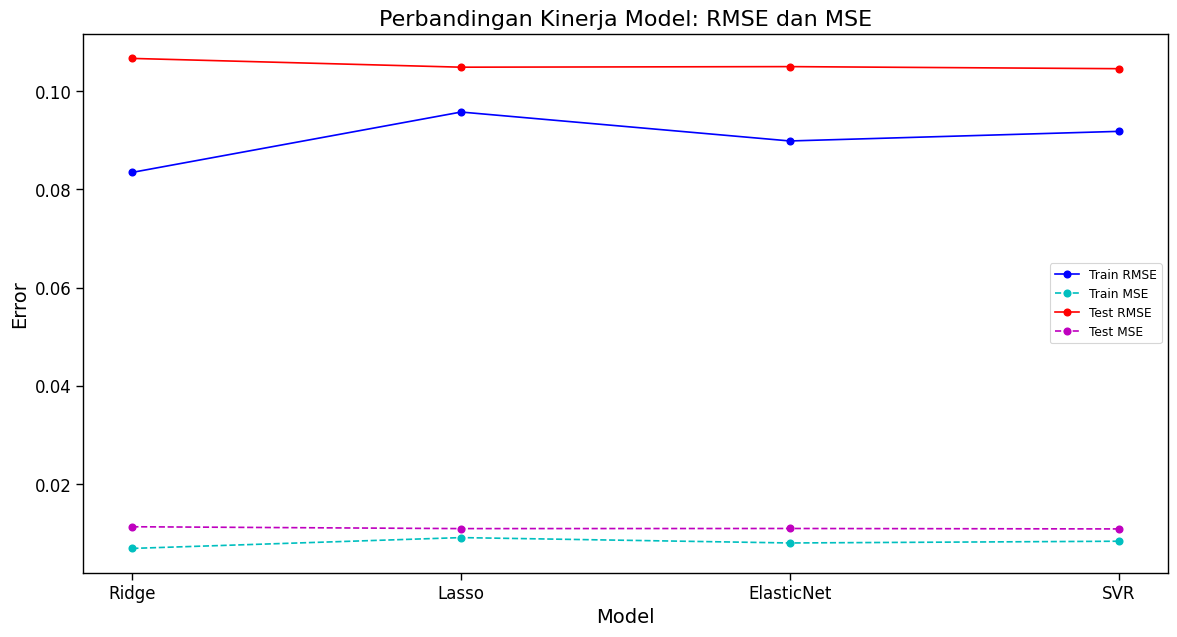

In [ ]:
# Data MSE dan RMSE dari model yang sudah dievaluasi
model_names = ['Ridge', 'Lasso', 'ElasticNet', 'SVR']

# Data untuk visualisasi
train_mse = [train_mse, lasso_mse_train, elastic_mse_train, svr_mse_train]  # MSE dari training
train_rmse = [train_rmse, lasso_rmse_train, elastic_rmse_train, svr_rmse_train]  # RMSE dari training
test_mse = [test_mse, lasso_mse_test, elastic_mse_test, svr_mse_test]  # MSE dari testing
test_rmse = [test_rmse, lasso_rmse_test, elastic_rmse_test, svr_rmse_test]  # RMSE dari testing

# Membuat line chart
plt.figure(figsize=(14, 7))

# Plot untuk Train RMSE
plt.plot(model_names, train_rmse, marker='o', label='Train RMSE', linestyle='-', color='b')
# Plot untuk Train MSE
plt.plot(model_names, train_mse, marker='o', label='Train MSE', linestyle='--', color='c')

# Plot untuk Test RMSE
plt.plot(model_names, test_rmse, marker='o', label='Test RMSE', linestyle='-', color='r')
# Plot untuk Test MSE
plt.plot(model_names, test_mse, marker='o', label='Test MSE', linestyle='--', color='m')

# Menambahkan judul dan label
plt.title('Perbandingan Kinerja Model: RMSE dan MSE', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)

# Menampilkan grafik
plt.show()